
## Assignment 2 - Movie Moneyball

### Import Useful Packages

In [1]:
# Import useful packages for data science
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline  

### Question 1: Import Data

Details of a large collecrtion of movies released between 1916 and 2017 are contained in the file **movies.csv** and **casts.csv**. Each row within **movies.csv** describes a movie, using the following fields:

* **id**: A nunique ID of the movie
* **title**: The title of the movie
* **tagline**: The tagline for the movie
* **homepage**: A URL for the homepage of the movive (may no longer exist)
* **release_date**: The release date of teh movei as yyyy/mm/dd
* **genre**: A category indicating the main genre of the movie
* **budget**: The budget of rthe movie in US dollars
* **keywords**: A list of keywords sdecribing the movie
* **original_language** The orginal labguage of the movie (as a two letter abbreviation, e.g. en for English)
* **revenue**: The revnue earned by the movie in US dollars
* **runtime**: The runtime of the movie in minutes
* **status**: The status of the movie (one of *Released*, *Rumored*, or *Post Production*)
* **vote_average**: The average rating for the movie (from 0 to 10)
* **vote_count**: The number of ratings that have been provided for the movie
* **director**: The director of the movie
       
Each row within **casts.csv** contains the id of a movie and the name of an actor in that move. This file uses the following fields:

* **id**: The id of the movie
* **billing**: The billing of the actor (one of *cast_0*, *cast_1*, *cast_2*, or *cast_3*)
* **actor**: The name of the actor

Load the two datasets (**movies.csv** and **casts.csv**) into pandas data frames: **movies** and **casts**. Display the first five rows from each.

In [2]:
# Write code here
movies = pd.read_csv("movies.csv")
display(movies.head())
movies.shape
casts = pd.read_csv("casts.csv")
display(casts.head())
casts.shape

,id,title,tagline,homepage,release_date,genre,budget,keywords,original_language,revenue,runtime,status,vote_average,vote_count,director
0,19995,Avatar,Enter the World of Pandora.,http://www.avatarmovie.com/,2009-12-10,Action,237000000,culture clash future space war space colony so...,en,2787965087,162.0,Released,7.2,11800,James Cameron
1,285,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.",http://disney.go.com/disneypictures/pirates/,2007-05-19,Adventure,300000000,ocean drug abuse exotic island east india trad...,en,961000000,169.0,Released,6.9,4500,Gore Verbinski
2,206647,Spectre,A Plan No One Escapes,http://www.sonypictures.com/movies/spectre/,2015-10-26,Action,245000000,spy based on novel secret agent sequel mi6,en,880674609,148.0,Released,6.3,4466,Sam Mendes
3,49026,The Dark Knight Rises,The Legend Ends,http://www.thedarkknightrises.com/,2012-07-16,Action,250000000,dc comics crime fighter terrorist secret ident...,en,1084939099,165.0,Released,7.6,9106,Christopher Nolan
4,49529,John Carter,"Lost in our world, found in another.",http://movies.disney.com/john-carter,2012-03-07,Action,260000000,based on novel mars medallion space travel pri...,en,284139100,132.0,Released,6.1,2124,Andrew Stanton


,id,billing,actor
0,19995,cast_0,Sam Worthington
1,285,cast_0,Johnny Depp
2,206647,cast_0,Daniel Craig
3,49026,cast_0,Christian Bale
4,49529,cast_0,Taylor Kitsch


(17564, 3)

### Question 2: Tidy

Define a function to convert dates into years.

In [3]:
def date_to_year(d):
    if(type(d) != str):
        return np.NaN
    else:
        date_parts = d.split('-')
        year = date_parts[0]
        return int(year)

Convert dates into years for each movie to add a new column **release_year**. The pandas Series **apply** function used togehter with the **date_to_year** function defined above can be used for this.

In [4]:
movies['release_year'] = movies["release_date"].apply(date_to_year)
movies.head()

,id,title,tagline,homepage,release_date,genre,budget,keywords,original_language,revenue,runtime,status,vote_average,vote_count,director,release_year
0,19995,Avatar,Enter the World of Pandora.,http://www.avatarmovie.com/,2009-12-10,Action,237000000,culture clash future space war space colony so...,en,2787965087,162.0,Released,7.2,11800,James Cameron,2009
1,285,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.",http://disney.go.com/disneypictures/pirates/,2007-05-19,Adventure,300000000,ocean drug abuse exotic island east india trad...,en,961000000,169.0,Released,6.9,4500,Gore Verbinski,2007
2,206647,Spectre,A Plan No One Escapes,http://www.sonypictures.com/movies/spectre/,2015-10-26,Action,245000000,spy based on novel secret agent sequel mi6,en,880674609,148.0,Released,6.3,4466,Sam Mendes,2015
3,49026,The Dark Knight Rises,The Legend Ends,http://www.thedarkknightrises.com/,2012-07-16,Action,250000000,dc comics crime fighter terrorist secret ident...,en,1084939099,165.0,Released,7.6,9106,Christopher Nolan,2012
4,49529,John Carter,"Lost in our world, found in another.",http://movies.disney.com/john-carter,2012-03-07,Action,260000000,based on novel mars medallion space travel pri...,en,284139100,132.0,Released,6.1,2124,Andrew Stanton,2012


Define a function to convert dates into months.

In [5]:
def date_to_month(d):
    # Write code here
    if(type(d)!= str):
        return np.NaN
    else:
        date_parts = d.split('-')
        month = date_parts[1]
        return int(month)
    _

Convert dates into months for each movie to add a new column **release_month**. The pandas Series **apply** function used togehter with the **date_to_month** function defined above can be used for this.

In [6]:
# Write code here
movies['release_month'] = movies["release_date"].apply(date_to_month)
movies.head()

,id,title,tagline,homepage,release_date,genre,budget,keywords,original_language,revenue,runtime,status,vote_average,vote_count,director,release_year,release_month
0,19995,Avatar,Enter the World of Pandora.,http://www.avatarmovie.com/,2009-12-10,Action,237000000,culture clash future space war space colony so...,en,2787965087,162.0,Released,7.2,11800,James Cameron,2009,12
1,285,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.",http://disney.go.com/disneypictures/pirates/,2007-05-19,Adventure,300000000,ocean drug abuse exotic island east india trad...,en,961000000,169.0,Released,6.9,4500,Gore Verbinski,2007,5
2,206647,Spectre,A Plan No One Escapes,http://www.sonypictures.com/movies/spectre/,2015-10-26,Action,245000000,spy based on novel secret agent sequel mi6,en,880674609,148.0,Released,6.3,4466,Sam Mendes,2015,10
3,49026,The Dark Knight Rises,The Legend Ends,http://www.thedarkknightrises.com/,2012-07-16,Action,250000000,dc comics crime fighter terrorist secret ident...,en,1084939099,165.0,Released,7.6,9106,Christopher Nolan,2012,7
4,49529,John Carter,"Lost in our world, found in another.",http://movies.disney.com/john-carter,2012-03-07,Action,260000000,based on novel mars medallion space travel pri...,en,284139100,132.0,Released,6.1,2124,Andrew Stanton,2012,3


### Question 2: Simple Analysis

Use simple data analysis to answer the following questions. 

**a)** In how many genres have movies been released?

In [7]:
# Write code here
movies['genre'].describe()

count      4389
unique       20
top       Drama
freq       1100
Name: genre, dtype: object

**b)** Generate and print a table showing many times movies have been released in each *genre*?

In [8]:
# Write code here
movie_genres = movies['genre'].value_counts()
print(movie_genres)

Drama          1100
Comedy          950
Action          702
Adventure       327
Horror          278
Crime           184
Thriller        170
Fantasy         112
Animation       111
Romance          98
Science          93
Documentary      73
Family           45
Mystery          39
Music            32
History          25
War              24
Western          23
TV                2
Foreign           1
Name: genre, dtype: int64


**c)** How many movies have been released under the *Comedy* genre?

In [9]:
# Write code here

comedy_genre = movies.loc[movies['genre']=='Comedy']
print(len(comedy_genre), ' Comedy movies have been released')



950  Comedy movies have been released


**d)** In which month are movies most frequently relased?

In [10]:
# Write code here
#movies['release_month'].value_counts()


#grouped_movies = \
#movies.groupby('release_month')
#display(grouped_movies['release_month'].describe())


month_freq = movies['release_month'].value_counts()
month_freq

most_freq = month_freq[0:1]
most_freq

# = movie_directors[0:10]
#prolific_directors

9    544
Name: release_month, dtype: int64

**e)** Who are the ten most prolific *directors* in the dataset?

In [11]:
# Write code here
movie_directors = movies['director'].value_counts()
prolific_directors = movie_directors[0:10]
prolific_directors

Steven Spielberg     27
Woody Allen          20
Martin Scorsese      20
Clint Eastwood       19
Ridley Scott         16
Renny Harlin         15
Robert Rodriguez     15
Steven Soderbergh    15
Tim Burton           14
Oliver Stone         14
Name: director, dtype: int64

### Question 3: Deeper Analysis

Use slightly more advanced data analysis to answer the following questions.

**a)** Draw an appropriate data visualsiation that shows the number of movies released each year?

<AxesSubplot:ylabel='Frequency'>

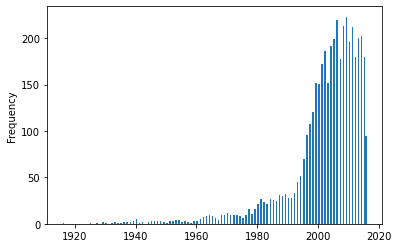

In [12]:
# Write code here

movies['release_year'].plot.hist(stacked = True, bins = 200)

**b)** What is the average duration of a movie (in minutes)?

In [16]:
# Write code here
display(movies['runtime'].mean())

108.11642743221691

**c)** How many times has there been a movie described with the keyword *spy*?

**Hint:** Experiment with the *str.contains* method from *pandas.Series*.

In [17]:
# Write code here
keyword_spy = movies.loc[movies['keywords'].str.contains('spy')]
spy_freq = len(keyword_spy)
print(spy_freq, ' movies were described with the keyword "spy"')

41  movies were described with the keyword "spy"


**d)** Which actor has starred in the most movies in the datset? 

In [61]:
# Write code here

actor_count = casts['actor'].value_counts()
actor_count[0:1]

Robert DeNiro    49
Name: actor, dtype: int64

**e)** Are movies by *Woody Allen*  longer, on average, than movies by *Martin Scorsese*?

**Bonus:** Can you plot a data visualisation to support this conclusion?

Martin Scorsese prodcues longer movies on average, his average is  140.35


<AxesSubplot:title={'center':'Average movie times : Allen Vrs Scorsese'}>

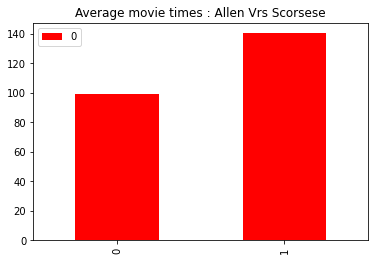

In [19]:
# Write code here
#woody_allen = movies['director'] == 'Woody Allen'

directors = movies.groupby(['director']).mean()
movie_length = directors['runtime']


allen_avg = movie_length['Woody Allen']
martin_avg = movie_length['Martin Scorsese']

if allen_avg > martin_avg:
        print('Woody Allen produces longer movies on average, his average is ', allen_avg)
        
else: 
    print('Martin Scorsese prodcues longer movies on average, his average is ', martin_avg)

avg_times = pd.DataFrame({allen_avg, martin_avg})




avg_times.plot(kind = 'bar', color = 'red', title = 'Average movie times : Allen Vrs Scorsese')

### Question 4: Merging Data

Answer questions that require merging the **movies** and **casts** datsets.

**a)** Which actor starred in the most movies in the year 2010?

In [54]:
# Write code here
#display(casts)
#display(movies)

movie_casts = \
    pd.merge(movies, \
             casts,
             on = 'id')


movie_freq = movie_casts[movie_casts['release_year']== 2010]
actor_freq = movie_freq['actor'].value_counts()
actor_star_2010 = actor_freq.head(1)

print(actor_star_2010, ' starred in the most movies in 2010')






Helen Mirren    5
Name: actor, dtype: int64  starred in the most movies in 2010


**b)** Which actor's movies have the highest total revenue in the dataset?

In [51]:
# Write code here
#display(movies)
 
    
#display(movie_casts)
actor_revenue = movie_casts[movie_casts]


,id,title,tagline,homepage,release_date,genre,budget,keywords,original_language,revenue,runtime,status,vote_average,vote_count,director,release_year,release_month,billing,actor
0,19995,Avatar,Enter the World of Pandora.,http://www.avatarmovie.com/,2009-12-10,Action,237000000,culture clash future space war space colony so...,en,2787965087,162.0,Released,7.2,11800,James Cameron,2009,12,cast_0,Sam Worthington
1,19995,Avatar,Enter the World of Pandora.,http://www.avatarmovie.com/,2009-12-10,Action,237000000,culture clash future space war space colony so...,en,2787965087,162.0,Released,7.2,11800,James Cameron,2009,12,cast_1,Zoe Saldana
2,19995,Avatar,Enter the World of Pandora.,http://www.avatarmovie.com/,2009-12-10,Action,237000000,culture clash future space war space colony so...,en,2787965087,162.0,Released,7.2,11800,James Cameron,2009,12,cast_2,Sigourney Weaver
3,19995,Avatar,Enter the World of Pandora.,http://www.avatarmovie.com/,2009-12-10,Action,237000000,culture clash future space war space colony so...,en,2787965087,162.0,Released,7.2,11800,James Cameron,2009,12,cast_3,Stephen Lang
4,285,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.",http://disney.go.com/disneypictures/pirates/,2007-05-19,Adventure,300000000,ocean drug abuse exotic island east india trad...,en,961000000,169.0,Released,6.9,4500,Gore Verbinski,2007,5,cast_0,Johnny Depp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17559,231617,"Signed, Sealed, Delivered",NaN,http://www.hallmarkchannel.com/signedsealeddel...,2013-10-13,Comedy,0,date love at first sight narration investigati...,en,0,120.0,Released,7.0,6,Scott Smith,2013,10,cast_3,Geoff Gustafson
17560,25975,My Date with Drew,NaN,NaN,2005-08-05,Documentary,0,obsession camcorder crush dream girl,en,0,90.0,Released,6.3,16,Brian Herzlinger,2005,8,cast_0,Drew Barrymore
17561,25975,My Date with Drew,NaN,NaN,2005-08-05,Documentary,0,obsession camcorder crush dream girl,en,0,90.0,Released,6.3,16,Brian Herzlinger,2005,8,cast_1,Brian Herzlinger
17562,25975,My Date with Drew,NaN,NaN,2005-08-05,Documentary,0,obsession camcorder crush dream girl,en,0,90.0,Released,6.3,16,Brian Herzlinger,2005,8,cast_2,Corey Feldman
